# 第5回課題
第5回課題では，以下の項目を満たすように分析してください．

明確な解答は用意していませんが，少なくとも間違っていないと言える推論をするようにしてください．

- データの取得
- データの確認
 - 特徴量の確認
 - ラベルの確認
- 仮説を立てる
- データの分析
- モデルの訓練
- 予測
- 精度の確認
- 仮説の確認

# データの取得
wine data 以外を利用してデータ分析してください．

なるべく，ラベルと属性から推論が立てやすいデータを選択するとやりやすいです．

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

# データの確認
データ分析以前にわかることを確認．特徴量の属性やドメイン知識など
- 特徴量の確認
- ラベルの確認

In [8]:
data = load_breast_cancer()
print(data["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

# 仮説を立てる
データについて，導きたい仮説と結論を整理してください．

悪性腫瘍(0)か良性腫瘍(1)にクラス分けをしたい

腫瘍の大きさに関する属性(半径,周の長さ,面積)とテクスチャーが関係してるのではないかと仮説を立てて分析していきます

# データの分析

In [17]:
X, Y = data["data"], data["target"]
df = pd.DataFrame(data["data"], columns=data["feature_names"])
df = pd.concat([df, pd.DataFrame(data["target"], columns=["target"])], axis=1)
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


# スケールがバラバラなので正規化

In [22]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
scaled_df = pd.DataFrame(min_max_scaler.fit_transform(data["data"]), columns=data["feature_names"])
scaled_df = pd.concat([scaled_df, pd.DataFrame(data["target"], columns=["target"])], axis=1)
scaled_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,0.270379,...,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596,0.627417
std,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,0.148702,...,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466,0.483918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,0.163016,...,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700,0.000000
50%,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,0.243892,...,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977,1.000000
75%,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,0.340354,...,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 相関

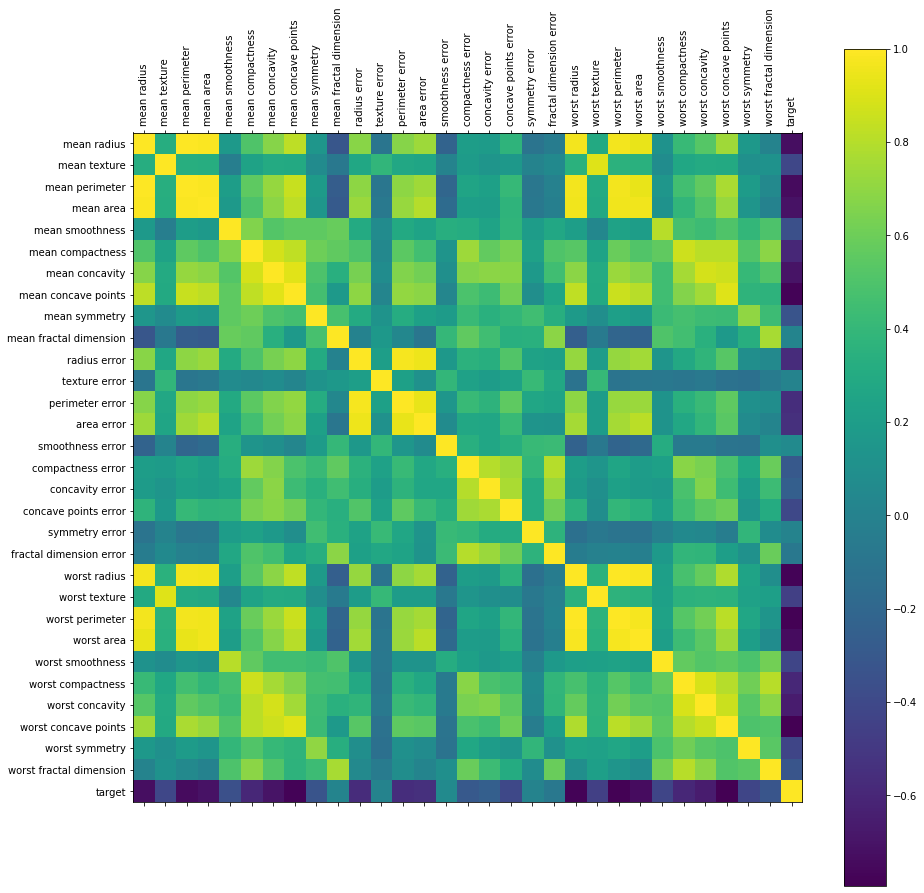

In [53]:
fig = plt.figure(figsize=(15, 15))
plt.matshow(df.corr("pearson"), fignum=fig.number)
plt.xticks(range(df.shape[1]), df.columns, rotation=90)
plt.yticks(range(df.shape[1]), df.columns)
plt.colorbar()

In [82]:
corr = df.corr("pearson").values
for i, v in enumerate(corr[:,30]):
    if abs(v) >= 0.5 and v != 1:
        print(df.columns[i],v)

mean radius -0.7300285113754569
mean perimeter -0.742635529725833
mean area -0.7089838365853909
mean compactness -0.596533677508253
mean concavity -0.6963597071719053
mean concave points -0.7766138400204361
radius error -0.5671338208247176
perimeter error -0.5561407034314833
area error -0.5482359402780249
worst radius -0.7764537785950388
worst perimeter -0.782914137173759
worst area -0.7338250349210516
worst compactness -0.5909982378417925
worst concavity -0.6596102103692344
worst concave points -0.7935660171412696


0.5は何となく

半径,周の長さ,面積と輪郭の凹部に関する特徴を上手く使えば分類できるかも

テクスチャーは有効ではなかったみたい

# モデルの訓練
データは分割するようにしてください．交叉検証についてはまだ説明したいので自由にしてください．

また，モデルの訓練およびデータ分割時に乱数の指定がないなど再現性がなさそうなコードは認めないことにします．

モデルは自由ですが，sklearn を想定しています．自作ライブラリも可ですが，自作の場合，該当箇所は適当に読みます．

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[data["feature_names"]], df["target"], test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((455, 30), (114, 30))

testセットが100個程度になるように分割

100個程度テストセットがあればテストセットとトレインセットが両方とも少なすぎることにならないくらいかなと思って

SVMと決定木で分類していく

In [90]:
from sklearn.svm import SVC
from sklearn import tree

In [128]:
svc_clf = SVC(random_state=0,gamma="scale")
svc_clf.fit(X_train, y_train)
tree_clf = tree.DecisionTreeClassifier(random_state=0)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

# 予測

In [131]:
svc_pred = svc_clf.predict(X_test)
tree_pred = tree_clf.predict(X_test)

# 精度の確認

In [132]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("正答率 SVM:" + str(accuracy_score(svc_pred, y_test)) + "      決定木:" + str(accuracy_score(tree_pred, y_test)))
print("適合率 SVM:" + str(precision_score(svc_pred, y_test, average=None)) + " 決定木:" + str(precision_score(tree_pred, y_test, average=None)))
print("再現率 SVM:" + str(recall_score(svc_pred, y_test, average=None)) + " 決定木:" + str(recall_score(tree_pred, y_test, average=None)))
print("f値    SVM:" + str(f1_score(svc_pred, y_test, average=None)) + " 決定木:" + str(f1_score(tree_pred, y_test, average=None)))

正答率 SVM:0.9298245614035088      決定木:0.9122807017543859
適合率 SVM:[0.85106383 0.98507463] 決定木:[0.93617021 0.89552239]
再現率 SVM:[0.97560976 0.90410959] 決定木:[0.8627451  0.95238095]
f値    SVM:[0.90909091 0.94285714] 決定木:[0.89795918 0.92307692]


[Text(899.775, 489.24, 'worst concave points <= 0.142\nentropy = 0.462\nsamples = 455\nvalue = [165, 290]\nclass = 1'),
 Text(544.0500000000001, 380.52000000000004, 'worst area <= 957.45\nentropy = 0.146\nsamples = 303\nvalue = [24, 279]\nclass = 1'),
 Text(334.8, 271.8, 'worst perimeter <= 107.75\nentropy = 0.073\nsamples = 288\nvalue = [11, 277]\nclass = 1'),
 Text(167.4, 163.08000000000004, 'worst fractal dimension <= 0.055\nentropy = 0.036\nsamples = 269\nvalue = [5, 264]\nclass = 1'),
 Text(83.7, 54.360000000000014, '\n  (...)  \n'),
 Text(251.10000000000002, 54.360000000000014, '\n  (...)  \n'),
 Text(502.20000000000005, 163.08000000000004, 'mean perimeter <= 91.92\nentropy = 0.432\nsamples = 19\nvalue = [6, 13]\nclass = 1'),
 Text(418.5, 54.360000000000014, '\n  (...)  \n'),
 Text(585.9, 54.360000000000014, '\n  (...)  \n'),
 Text(753.3000000000001, 271.8, 'mean symmetry <= 0.152\nentropy = 0.231\nsamples = 15\nvalue = [13, 2]\nclass = 0'),
 Text(669.6, 163.08000000000004, 'entr

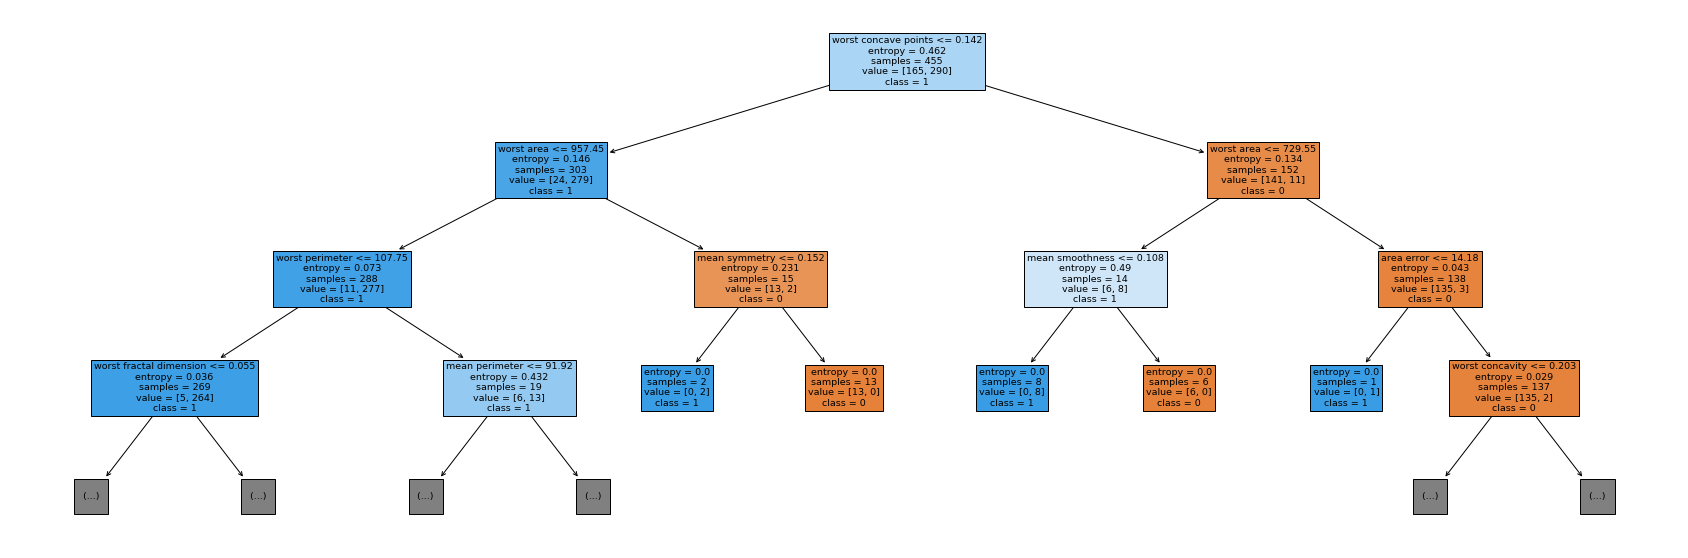

In [141]:
plt.figure(figsize=(30, 10))
tree.plot_tree(tree_clf, feature_names=data["feature_names"], class_names=["0", "1"],filled=True, max_depth=3) 

# 仮説の確認
最初に立てた仮説を確認してください．

予測傾向など精度ベースでも仮説を確認することはできますが，決定木や可視化を用いる方が楽かもしれません．

相関から腫瘍の輪郭上の凹面の数の最悪値が判断する上で最も関係あることがわかる。

調べても詳しくはよくわからなかったが、凹面の数が多いと癌になりやすいのは事実だった。

その次に腫瘍の大きさに関する特徴が重要であった。大きくなると凹面になりうるところが増えるから？

途中でも述べたように、テクスチャーは判断する上ではあまり関係なかった。あくまで腫瘍がそこにあるかどうかしかわからないらしい。

癌に関しては再現率を重要視するべきだから、SVMの方が決定木より今回は適している。